## Banco de dados DATASET3 - Bearing Classification

### Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import iirnotch


### Carregamento de arquivos

In [2]:

path_signals = '../../Dados/Rotor_Bearing/Dataset3/bearing_signals/bearing_signals.csv'
df_signals =pd.read_csv(path_signals)

path_classes = '../../Dados/Rotor_Bearing/Dataset3/bearing_signals/bearing_classes.csv'
df_classes =pd.read_csv(path_classes)


In [3]:
id_experiment = 95
experiment = df_signals[df_signals['experiment_id']==id_experiment]
experiments_ids = df_signals['experiment_id'].unique()

#### -------------------------------------------------------------------------------------------------------------------

### Tratamento dos dados em vetores de entrada

#### Separar por EXECUÇÃO (experiment_id) - DEPOIS

In [72]:
# signals[(signals['experiment_id']==13)]['a1_x'].plot()
# print(df_signals[(df_signals['experiment_id']==10)]['a1_x'])

768900   -0.175320
768901   -0.367713
768902   -0.175320
768903    0.017072
768904    0.017072
            ...   
857395   -0.079124
857396    0.017072
857397    0.113269
857398    0.498054
857399    0.113269
Name: a1_x, Length: 88500, dtype: float64


##### Todos os experimentos_ids Juntos

In [4]:
# Assuming your DataFrame is named 'df'
# Extracting columns for the first NumPy array
ids = ['experiment_id', 'bearing_1_id', 'bearing_2_id']
np_ids = df_signals[ids].values

np_classes = df_classes.values

list_classes = list()

timestamp = df_signals['timestamp'].values

# Extracting columns for the second NumPy array
parameters = ['a1_x', 'a1_y', 'a1_z', 'a2_x', 'a2_y', 'a2_z', 'rpm']
np_parameters = df_signals[parameters].values

for i in np_classes:
    list_classes.append(i[0].split(";"))



In [5]:
## BEARING 1
# Convert list_classes to a dictionary for efficient lookups
class_dict = {item[0]: item[1] for item in list_classes}

# Compare the third column of np_ids with the first index of list_classes
mask = np.isin(np_ids[:, 1].astype(str), list(class_dict.keys()))

# Update the third column in np_ids where there is a match
np_ids[mask, 1] = [class_dict[str(item)] for item in np_ids[mask, 1]]

## ---------------------------------------------------------------------##

## BEARING 2
# Convert list_classes to a dictionary for efficient lookups
class_dict = {item[0]: item[1] for item in list_classes}

# Compare the third column of np_ids with the first index of list_classes
mask = np.isin(np_ids[:, 2].astype(str), list(class_dict.keys()))

# Update the third column in np_ids where there is a match
np_ids[mask, 2] = [class_dict[str(item)] for item in np_ids[mask, 2]]


In [40]:
import numpy as np

# Create a set of unique rows based on the first column
unique_rows, unique_indices = np.unique(np_ids[:, 0], return_index=True)

# Extract the unique rows
output_array = np_ids[unique_indices][:][:,-1]


0

array([[  1,   1,   0],
       [  1,   1,   0],
       [  1,   1,   0],
       ...,
       [112,   1,   1],
       [112,   1,   1],
       [112,   1,   1]], dtype=int64)

10265700

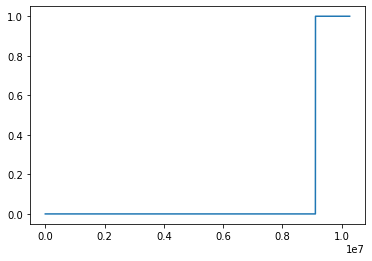

In [8]:

bearing1 = [np_parameters[:,0], np_parameters[:,1], np_parameters[:,2], np_ids[:,1]]
bearing2 = [np_parameters[:,3], np_parameters[:,4], np_parameters[:,5], np_ids[:,2]]

output = []

for i in range(0, len(bearing2[-1])):
    if bearing1[-1][i] and bearing2[-1][i]:
        output.append(1)
    else:
        output.append(0)

plt.plot(output)
len(output)


#### Visualização dos sinais


##### Bearing1

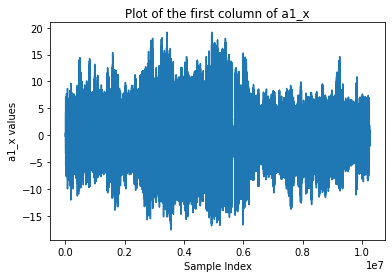

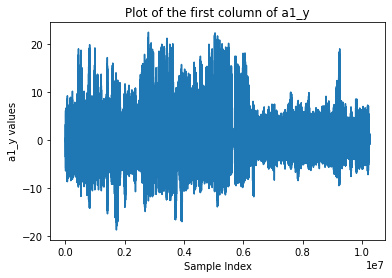

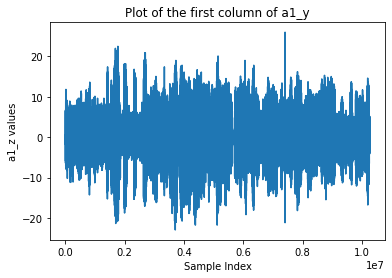

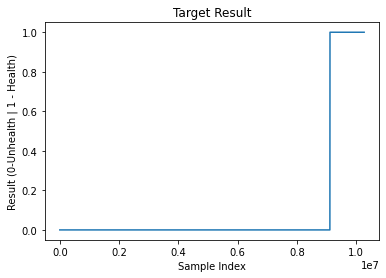

In [8]:
plt.plot(bearing1[0])
plt.xlabel('Sample Index')
plt.ylabel('a1_x values')
plt.title('Plot of the first column of a1_x')
plt.show()

plt.plot(bearing1[1])
plt.xlabel('Sample Index')
plt.ylabel('a1_y values')
plt.title('Plot of the first column of a1_y')
plt.show()

plt.plot(bearing1[2])
plt.xlabel('Sample Index')
plt.ylabel('a1_z values')
plt.title('Plot of the first column of a1_y')
plt.show()

plt.plot(bearing1[3])
plt.xlabel('Sample Index')
plt.ylabel('Result (0-Unhealth | 1 - Health)')
plt.title('Target Result')
plt.show()


##### Bearing2

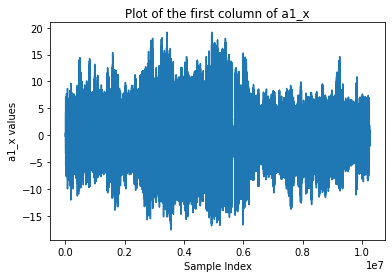

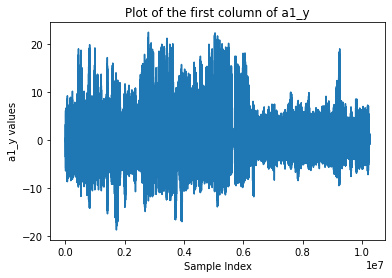

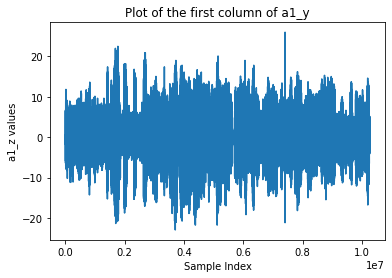

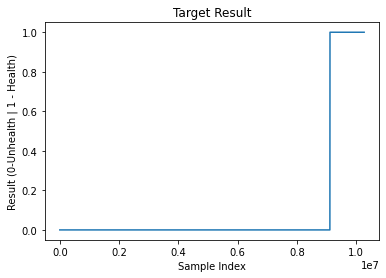

In [59]:
plt.plot(bearing2[0])
plt.xlabel('Sample Index')
plt.ylabel('a1_x values')
plt.title('Plot of the first column of a1_x')
plt.show()

plt.plot(bearing2[1])
plt.xlabel('Sample Index')
plt.ylabel('a1_y values')
plt.title('Plot of the first column of a1_y')
plt.show()

plt.plot(bearing2[2])
plt.xlabel('Sample Index')
plt.ylabel('a1_z values')
plt.title('Plot of the first column of a1_y')
plt.show()

plt.plot(bearing2[3])
plt.xlabel('Sample Index')
plt.ylabel('Result (0-Unhealth | 1 - Health)')
plt.title('Target Result')
plt.show()


In [10]:
# print(abs(np_parameters[:, -1]))

# plt.plot(abs(np_parameters[:, -1][10000000::]))
# plt.show()


### Aplicação de técnicas de pré-processamento de sinais - Filtros

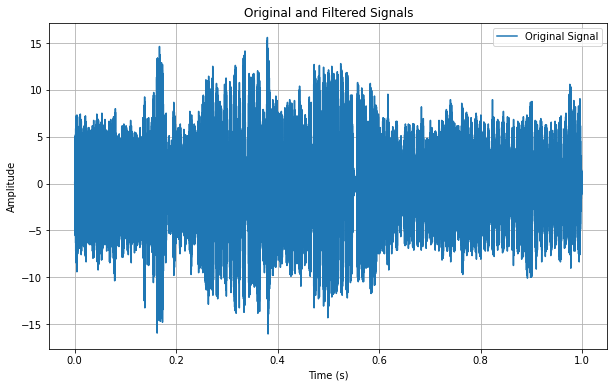

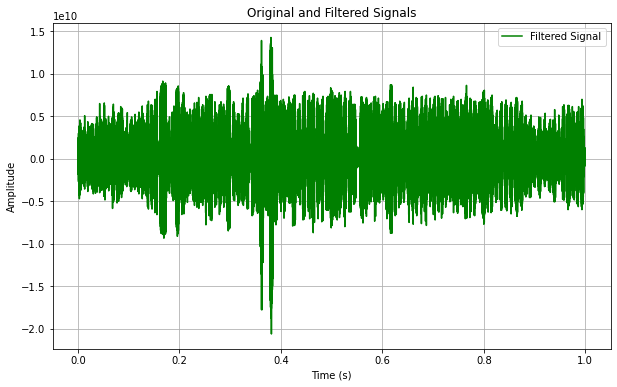

In [62]:
## 60Hz - Filtro Notch
# Generate a sample signal with a 60 Hz interference
fs = 10265700  # Sampling frequency
t = np.arange(0, 1, 1/fs)
f_interference = 60  # Frequency of interference

# Design a notch filter at 60 Hz
Q = 30.0  # Quality factor
f0 = 60.0  # Center frequency in Hz
w0 = f0 / (fs / 2)  # Normalized frequency
b, a = iirnotch(w0, Q)

# Apply the notch filter to the signal
filtered_signal = np.convolve(bearing1[0], b, mode='same') / np.convolve(np.ones_like(bearing1[0]), a, mode='same')

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, bearing1[0], label='Original Signal')
# plt.plot(t, filtered_signal, label='Filtered Signal')
plt.title('Original and Filtered Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
# plt.plot(t, a1_x, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal', color='g')
plt.title('Original and Filtered Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


### -----------------------------------------------------------------------------------------------------

### Apresentacao de técnicas de processamento de sinais - Cálculos estatísticos

#### Time-Domain Features

##### Envelope, Spectogram, Histogram

##### Skewness

In [9]:
from scipy.stats import skew

def get_skewness(signal):
    return skew(signal)

##### Kurtosis

In [10]:
from scipy.stats import kurtosis

def get_kurtosis(signal):
    return kurtosis(signal)

##### Shape Factor

In [11]:
def get_shape_factor(signal):
    N = len(signal)
    return np.sqrt(((signal**2).sum()/N) / ((abs(signal)).sum()/N))

##### Variation

In [12]:
import statistics

def get_variance(signal):
    return statistics.variance(signal)

##### Standard Deviation

In [13]:
def get_std(signal):
    return statistics.stdev(signal)

##### RMS

In [14]:
def get_rms_acceleration(signal):
    N = len(signal)
    return np.sqrt(1/N * (signal**2).sum())

##### Peak-to-Peak

In [15]:
def get_peak_acceleration(signal):
    return max(abs(signal))

##### Crest Factor

In [16]:
def get_crest_factor(signal):
    return get_peak_acceleration(signal)/get_rms_acceleration(signal)

#### Frequency-Domain Features

In [17]:
def get_frequency_centre(signal):
    return ((signal.diff()*signal).sum()) / (2 * np.pi * np.sum(signal**2))
def get_mean_square_frequency(signal):
    return  np.sum(signal.diff()**2) / (4 * np.pi**2 * np.sum(signal**2))
def get_root_mean_square_frequency(signal):
    return  np.sqrt(get_mean_square_frequency(signal))
def get_root_variance_frequency(signal):
    return  np.sqrt(get_mean_square_frequency(signal) - get_frequency_centre(signal)**2)

In [18]:
# list_features_function = [get_skewness, get_kurtosis, get_shape_factor, get_variance, get_std, get_rms_acceleration, 
#                           get_peak_acceleration,
#                           get_crest_factor, get_frequency_centre, get_mean_square_frequency, get_root_mean_square_frequency, 
#                           get_root_variance_frequency]
list_features_function = [get_skewness]

len(list_features_function)

1

##### Estimate power spectral density using Welch’s method.


##### Power Spectral Density (PSD)

##### Função de Densidade de Probabilidade (PDF). - cálculo de skewness e kurtosis

### Aplicação da Funções acima instanciadas

In [47]:
data_features = []
i = 0
for exp in experiments_ids:
    experiment = df_signals[(df_signals['experiment_id']==exp)]
    feature_a1_x = []
    feature_a1_y = []
    feature_a1_z = []
    feature_a2_x = []
    feature_a2_y = []
    feature_a2_z = []
    feature_rpm = []
    for func in list_features_function:
        
        a1_x = func(experiment['a1_x'])
        a1_y = func(experiment['a1_y'])
        a1_z = func(experiment['a1_z'])
        a2_x = func(experiment['a2_x'])
        a2_y = func(experiment['a2_y'])
        a2_z = func(experiment['a2_z'])
        rpm = func(experiment['rpm'])

        if type(a1_x) == list:
            feature_a1_x+=a1_x
            feature_a1_y+=a1_y
            feature_a1_z+=a1_z
            feature_a2_x+=a2_x
            feature_a2_y+=a2_y
            feature_a2_z+=a2_z
            feature_rpm +=rpm
            
        else:
            feature_a1_x.append(a1_x)
            feature_a1_y.append(a1_y)
            feature_a1_z.append(a1_z)
            feature_a2_x.append(a2_x)
            feature_a2_y.append(a2_y)
            feature_a2_z.append(a2_z)
            feature_rpm.append(rpm)

    
    data_features.append([feature_a1_x, feature_a1_y, feature_a1_z, feature_a2_x, feature_a2_y, feature_a2_z, feature_rpm, [output_array[exp-1]]])



In [48]:
data_features


[[[-0.16214969575689375],
  [0.14798380962109128],
  [-0.44169343908347314],
  [-0.0023907603868359648],
  [0.06657562921357282],
  [0.060052415933858495],
  [-0.8775948598013407],
  [0]],
 [[-0.17194237199738835],
  [-0.05016599790470992],
  [-0.22887829010828334],
  [-0.15623293546281578],
  [-0.1889724335603531],
  [-0.07193393131460796],
  [-0.6976508552641528],
  [0]],
 [[-0.0873483671415376],
  [0.011154330575770479],
  [-0.2029182416416925],
  [-0.06141842680792487],
  [-0.23283644753254304],
  [-0.06440752555506808],
  [-1.103344326725167],
  [0]],
 [[-0.1175677499360997],
  [0.10688058183155154],
  [-0.1757379518324025],
  [0.026074168771749597],
  [0.08030346724156988],
  [0.08175031555013607],
  [-1.0852256565655483],
  [0]],
 [[-0.20240973686418562],
  [0.015325744407544509],
  [-0.1979848713775262],
  [-0.050899321176489765],
  [-0.011006927073537577],
  [0.11643516605221753],
  [-0.7330897883352233],
  [0]],
 [[-0.2368847089031095],
  [0.9761818525910045],
  [0.1323026940

In [49]:
features_list = list()

for i in data_features:
    y = np.concatenate([np.array(x) for x in i])
    features_list.append(y)

features_list = np.array(features_list)
features_list

array([[-1.62149696e-01,  1.47983810e-01, -4.41693439e-01,
        -2.39076039e-03,  6.65756292e-02,  6.00524159e-02,
        -8.77594860e-01,  0.00000000e+00],
       [-1.71942372e-01, -5.01659979e-02, -2.28878290e-01,
        -1.56232935e-01, -1.88972434e-01, -7.19339313e-02,
        -6.97650855e-01,  0.00000000e+00],
       [-8.73483671e-02,  1.11543306e-02, -2.02918242e-01,
        -6.14184268e-02, -2.32836448e-01, -6.44075256e-02,
        -1.10334433e+00,  0.00000000e+00],
       [-1.17567750e-01,  1.06880582e-01, -1.75737952e-01,
         2.60741688e-02,  8.03034672e-02,  8.17503156e-02,
        -1.08522566e+00,  0.00000000e+00],
       [-2.02409737e-01,  1.53257444e-02, -1.97984871e-01,
        -5.08993212e-02, -1.10069271e-02,  1.16435166e-01,
        -7.33089788e-01,  0.00000000e+00],
       [-2.36884709e-01,  9.76181853e-01,  1.32302694e-01,
         7.42204647e-02,  9.16057576e-01, -1.32041840e-01,
        -9.37906345e-01,  0.00000000e+00],
       [-1.98646986e-01,  8.667406

In [54]:
features_list

array([[-1.62149696e-01,  1.47983810e-01, -4.41693439e-01,
        -2.39076039e-03,  6.65756292e-02,  6.00524159e-02,
        -8.77594860e-01,  0.00000000e+00],
       [-1.71942372e-01, -5.01659979e-02, -2.28878290e-01,
        -1.56232935e-01, -1.88972434e-01, -7.19339313e-02,
        -6.97650855e-01,  0.00000000e+00],
       [-8.73483671e-02,  1.11543306e-02, -2.02918242e-01,
        -6.14184268e-02, -2.32836448e-01, -6.44075256e-02,
        -1.10334433e+00,  0.00000000e+00],
       [-1.17567750e-01,  1.06880582e-01, -1.75737952e-01,
         2.60741688e-02,  8.03034672e-02,  8.17503156e-02,
        -1.08522566e+00,  0.00000000e+00],
       [-2.02409737e-01,  1.53257444e-02, -1.97984871e-01,
        -5.08993212e-02, -1.10069271e-02,  1.16435166e-01,
        -7.33089788e-01,  0.00000000e+00],
       [-2.36884709e-01,  9.76181853e-01,  1.32302694e-01,
         7.42204647e-02,  9.16057576e-01, -1.32041840e-01,
        -9.37906345e-01,  0.00000000e+00],
       [-1.98646986e-01,  8.667406

### Aplicação de técnicas de inteligência artificial

###### Kohonen Map

In [66]:
## Kohonen Map (clusterizacao) - 1º - unsupervised
from sklearn_som.som import SOM

iris_som = SOM(n=1,m=2,dim=8, max_iter=30000) ## ver como aplicar corretamente
iris_som.fit(features_list)
predictions = iris_som.predict(features_list)
predictions


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

<function get_skewness at 0x000001543A9BEF70>


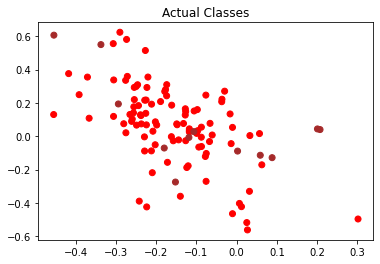

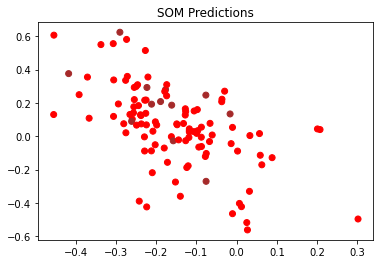

In [70]:
from matplotlib.colors import ListedColormap

x = features_list[:,0]
y = features_list[:,3]
label = features_list[:,-1]
colors = ['red', 'green', 'blue', 'purple', 'pink', 'black', 'yellow', 'brown']

# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x, y, c=label, cmap=ListedColormap(colors))
ax.title.set_text('Actual Classes')
# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x,y, c=predictions, cmap=ListedColormap(colors))
ax.title.set_text('SOM Predictions')
plt.savefig('iris_example.png')

###### KNN

###### K-Means

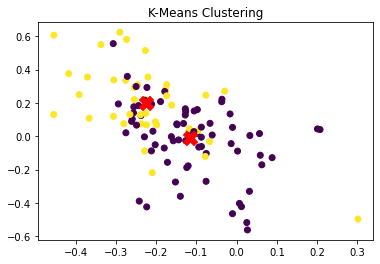

In [68]:
## K-Means (clusterização) - 1º - unsupervised
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X = features_list[:, 0:5]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 3], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 3], marker='X', s=200, color='red')
plt.title('K-Means Clustering')
plt.show()

In [77]:
## MLP (classificacao) - supervised
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

X = features_list[:, 0:5]
y = features_list[:, -1]
print(y)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# Fit the classifier to the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = mlp_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Print the validation results
print("Validation Results:")
print(f"Accuracy: {val_accuracy}")
print("Classification Report:\n", val_classification_rep)

# Make predictions on the testing data
y_test_pred = mlp_classifier.predict(X_test)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Print the testing results
print("\nTesting Results:")
print(f"Accuracy: {test_accuracy}")
print("Classification Report:\n", test_classification_rep)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Validation Results:
Accuracy: 0.9411764705882353
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        16
         1.0       0.50      1.00      0.67         1

    accuracy                           0.94        17
   macro avg       0.75      0.97      0.82        17
weighted avg       0.97      0.94      0.95        17


Testing Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00     

c:\Users\amand\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Testing Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



c:\Users\amand\AppData\Local\Programs\Python\Python39\lib\site-packages\scikitplot\metrics.py:124: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


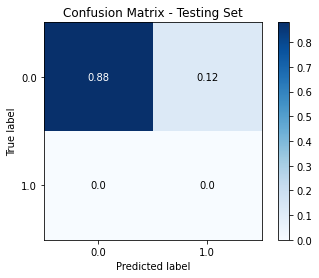

In [79]:
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_confusion_matrix

# Make predictions on the testing data
y_test_pred = mlp_classifier.predict(X_test)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Print the testing results
print("\nTesting Results:")
print(f"Accuracy: {test_accuracy}")
print("Classification Report:\n", test_classification_rep)

# Plot the confusion matrix for the testing set
cm = confusion_matrix(y_test, y_val_pred)
plot_confusion_matrix(y_test, y_val_pred, normalize=True)  # Set normalize=True for a normalized confusion matrix
plt.title("Confusion Matrix - Testing Set")
plt.show()

In [100]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# # Load the Iris dataset
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

X = features_list[:, 0:5]
y = features_list[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class LVQ:
    def __init__(self, prototypes, learning_rate=0.01, epochs=100):
        self.prototypes = prototypes
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                # Find the prototype closest to the current input
                distances = np.linalg.norm(xi - self.prototypes, axis=1)
                winner_index = np.argmin(distances)

                # Update the winning prototype
                self.prototypes[winner_index] += self.learning_rate * (xi - self.prototypes[winner_index])

    def predict(self, X):
        predictions = []
        for xi in X:
            distances = np.linalg.norm(xi - self.prototypes, axis=1)
            winner_index = np.argmin(distances)
            predictions.append(winner_index)
        return predictions

# Initialize the LVQ model
num_classes = len(np.unique(y_train))
num_prototypes_per_class = 1
num_prototypes = num_classes * num_prototypes_per_class
print(num_prototypes)

lvq = LVQ(prototypes=X_train[:num_prototypes], learning_rate=0.001, epochs=10000)

# Train the LVQ model
lvq.train(X_train, y_train)

# Make predictions on the test set
y_pred = lvq.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


2
Accuracy: 0.6176470588235294


###### Spectograma com CNN 

In [ ]:
## CNN (spectogramas por experimento ID )
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Step 1: Generate the spectrogram from the audio signal

# Load an audio file (replace 'your_audio_file.wav' with the path to your audio file)
sample_rate, audio_data = wavfile.read('your_audio_file.wav')

# Create a spectrogram
frequencies, times, spectrogram_data = spectrogram(audio_data, fs=sample_rate)

# Step 2: Convert the spectrogram to a colormap image

# Plot the spectrogram to get the colormap
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='auto')
plt.axis('off')  # Turn off axis labels
plt.savefig('spectrogram_colormap.png', bbox_inches='tight', pad_inches=0)
plt.close()

# Step 3: Use the colormap image as input to the CNN

# Load the saved colormap image using PIL
spectrogram_colormap_image = Image.open('spectrogram_colormap.png')

# Convert the image to a NumPy array
spectrogram_colormap_array = np.array(spectrogram_colormap_image)

# Reshape the array to (height, width, channels) for CNN input
spectrogram_colormap_array = np.expand_dims(spectrogram_colormap_array, axis=-1)
spectrogram_colormap_array = np.expand_dims(spectrogram_colormap_array, axis=0)

# Build a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(spectrogram_colormap_array.shape[1:])))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create dummy labels for the example
dummy_labels = to_categorical([0])

# Train the model (you may want to use your actual training data)
model.fit(spectrogram_colormap_array, dummy_labels, epochs=5, batch_size=1)

# Note: Adjust the model architecture, hyperparameters, and training process based on your actual use case.


### Gráficos - Apresentação dos resultados

#### CHATGPT HELP


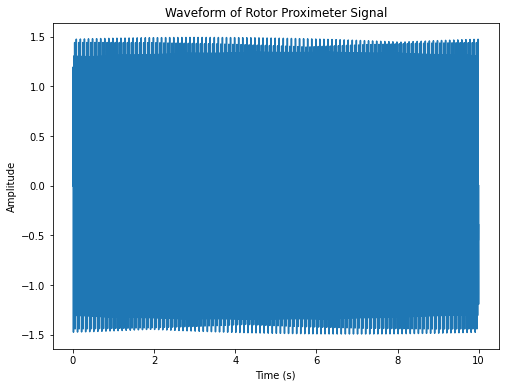

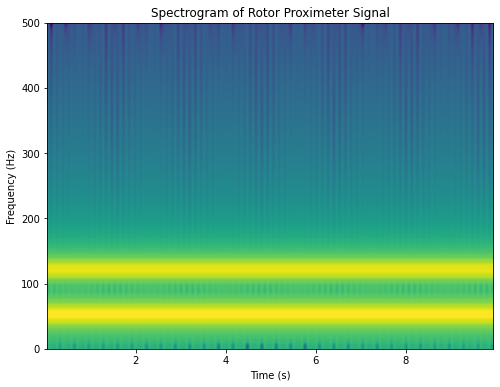

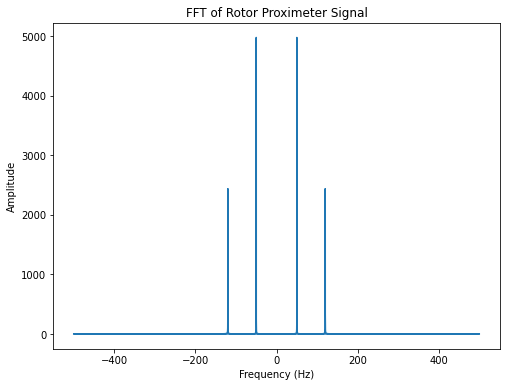

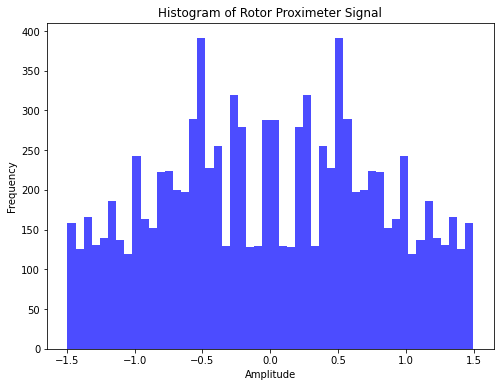

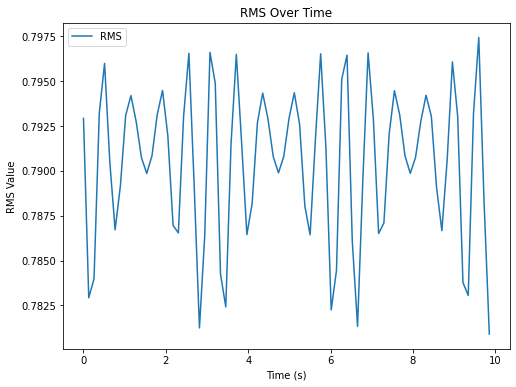

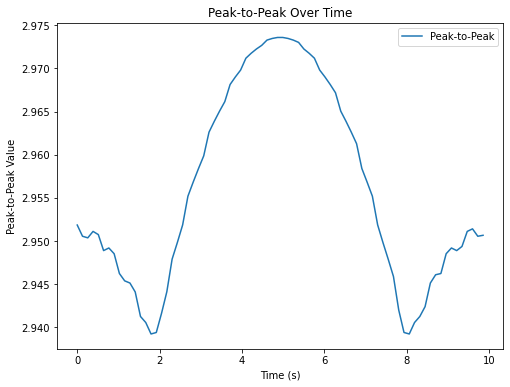

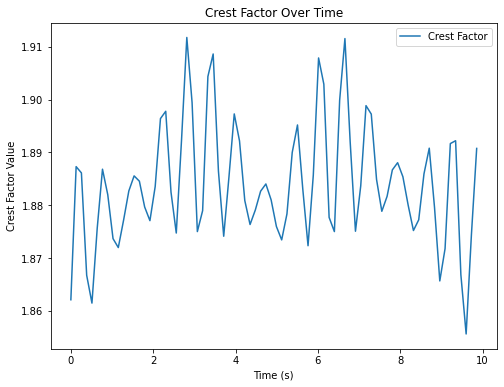

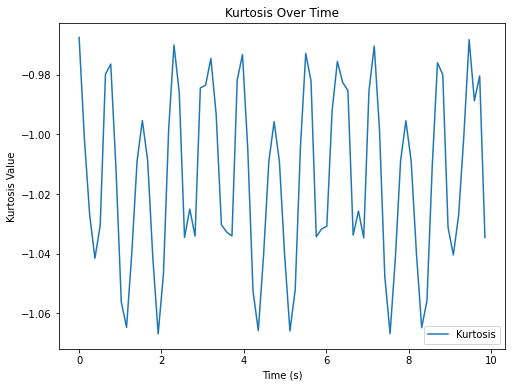

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# Example data (replace this with your rotor proximeter signal)
fs = 1000  # Sampling frequency in Hz
t = np.linspace(0, 10, 10 * fs)  # 10 seconds of data
rotor_signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)  # Example signal with 50 Hz and 120 Hz components

# Plot the waveform
plt.figure(figsize=(8, 6))
plt.plot(t, rotor_signal)
plt.title('Waveform of Rotor Proximeter Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Calculate the spectrogram
plt.figure(figsize=(8, 6))
plt.specgram(rotor_signal, Fs=fs, NFFT=128, noverlap=64, cmap='viridis')
plt.title('Spectrogram of Rotor Proximeter Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

# Calculate the Discrete Fourier Transform (FFT)
plt.figure(figsize=(8, 6))
fft_result = np.fft.fft(rotor_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/fs)

plt.plot(frequencies, np.abs(fft_result))
plt.title('FFT of Rotor Proximeter Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Calculate and plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(rotor_signal, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Rotor Proximeter Signal')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.show()

# Windowing with 256 samples
window_size = 128
num_windows = len(rotor_signal) // window_size
windows = np.array_split(rotor_signal[:num_windows * window_size], num_windows)

# Calculate RMS, peak-to-peak, crest factor, and kurtosis for each window
rms_values = []
peak_to_peak_values = []
crest_factor_values = []
kurtosis_values = []

for window in windows:
    rms_values.append(np.sqrt(np.mean(window**2)))
    peak_to_peak_values.append(np.max(window) - np.min(window))
    crest_factor_values.append(np.max(np.abs(window)) / np.sqrt(np.mean(window**2)))
    kurtosis_values.append(kurtosis(window))

# Plot the calculated values
plt.figure(figsize=(8, 6))
time_axis = np.arange(0, len(rms_values)) * (window_size / fs)
plt.plot(time_axis, rms_values, label='RMS')
plt.title('RMS Over Time')
plt.xlabel('Time (s)')
plt.ylabel('RMS Value')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(time_axis, peak_to_peak_values, label='Peak-to-Peak')
plt.title('Peak-to-Peak Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Peak-to-Peak Value')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(time_axis, crest_factor_values, label='Crest Factor')
plt.title('Crest Factor Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Crest Factor Value')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(time_axis, kurtosis_values, label='Kurtosis')
plt.title('Kurtosis Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Kurtosis Value')
plt.legend()
plt.show()
